# Census Income

<img src="census.jfif" width="500" height="500" />

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1//master/census_income.csv ')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In this dataset, we are given demographic and economic details about individuals, which we aim to analyze in order to predict their income levels. The dataset includes various columns:

1.Fnlwgt seems to represent a population weight factor.

2.Education provides the education level as text (e.g., Bachelors, HS-grad), while Education_num gives the same information in numeric form.

3.Marital_status indicates the individual's marital condition (e.g., Married-civ-spouse, Divorced etc).

4.Occupation shows the type of job the person holds (e.g., Exec-managerial, Handlers-cleaners).

5.Relationship describes their role in the household (e.g., Husband, Wife, Own-child).

6.Race and Sex provide basic demographic information about the individual.

7.Capital_gain and Capital_loss indicate any financial gains or losses from investments.

8.Hours_per_week tells us how many hours per week they typically work.

9.Native_country lists the individual’s country of origin.

10.Income is the target variable, categorizing people into two groups: those earning <=50K or >50K annually.

# Exploratory Data Analysis(EDA)

In [90]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [91]:
df.shape

(32560, 15)

In [92]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [93]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [94]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In the process of taking out value count we found few columns have '?' mark instead of any value or data so we are first dealing with it by taking out its occurence in whichever column it is and then replacing it with appropiate data.

In [95]:
# Dealing with '?' mark .
df['Workclass'].replace(' ?', 'Unknown', inplace=True)
df['Occupation'].replace(' ?', 'Unknown', inplace=True)
df['Native_country'].replace(' ?', 'Other', inplace=True)

# proceeding with value_counts() which represents the number of occurrences of each unique value in a specific column of a DataFrame. 

In [96]:
df['Workclass'].value_counts()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [97]:
df['Education'].value_counts()

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [98]:
df['Marital_status'].value_counts()

Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [99]:
df['Occupation'].value_counts()

Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [100]:
df['Native_country'].value_counts()

Native_country
 United-States                 29169
 Mexico                          643
Other                            583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [101]:
df['Age'].value_counts()

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [102]:
df['Sex'].value_counts()

Sex
 Male      21789
 Female    10771
Name: count, dtype: int64

In [103]:
df['Race'].value_counts()

Race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [104]:
df['Fnlwgt'].value_counts()

Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64

In [105]:
df['Income'].value_counts()

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

In [106]:
df['Relationship'].value_counts()

Relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [107]:
df['Hours_per_week'].value_counts()

Hours_per_week
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: count, Length: 94, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This dataset contains 32,560 rows and 15 columns. The columns include both numeric (int64) and categorical (object) data types:

1. 6 columns are numeric (e.g., Age, Fnlwgt, Capital_gain, etc.), which represent quantities or counts.

2. 9 columns are categorical, represented as object data types, which include categories like Workclass, Education, Occupation, etc.

3. All columns have complete data, meaning there are no missing values. The dataset requires about 3.7 MB of memory.

In [109]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

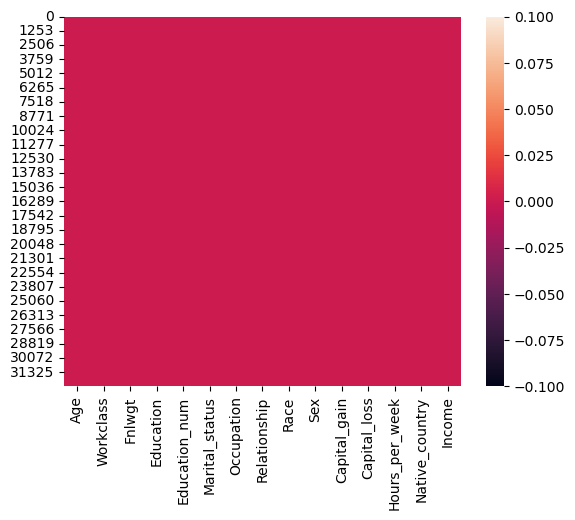

In [110]:
#Visulizing above data with Heatmap
sns.heatmap(df.isnull())

In [111]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The dataset shows that most individuals are around 38 years old, with an average of 10 years of education. Most work 40 hours per week, with little to no capital gain or loss. The fnlwgt variable has high variability, while age and hours worked show consistent patterns around typical full-time employment. Capital gains and losses are rare, with a large portion of the population reporting 0 in both.

In [112]:
# Rechecking whether any column contain '?'
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

so we have dealt with '?' successfully and can see no such error.

# Data Visualization

# 1. Income Distribution

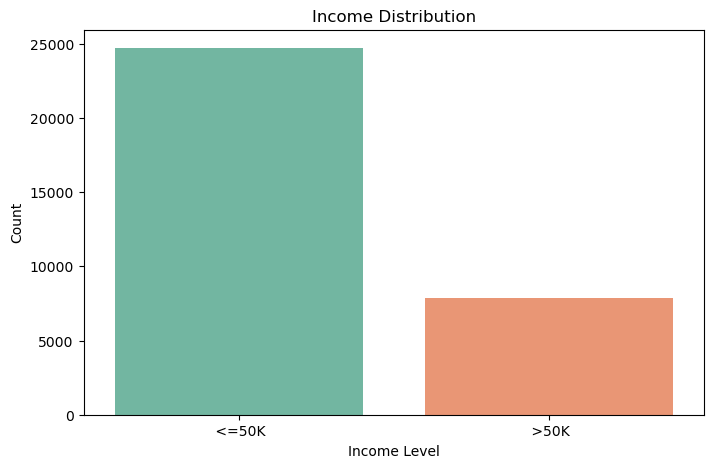

In [113]:
# Income Distribution

plt.figure(figsize=(8, 5))

sns.countplot(x='Income', data=df, palette='Set2')
plt.title('Income Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

So the above plot is showing the distribution of income levels in the dataset. The count plot visualizes the frequency of each income category (<=50K and >50K), giving an insight into the imbalance in the target variable.

# 2. Workclass vs Income

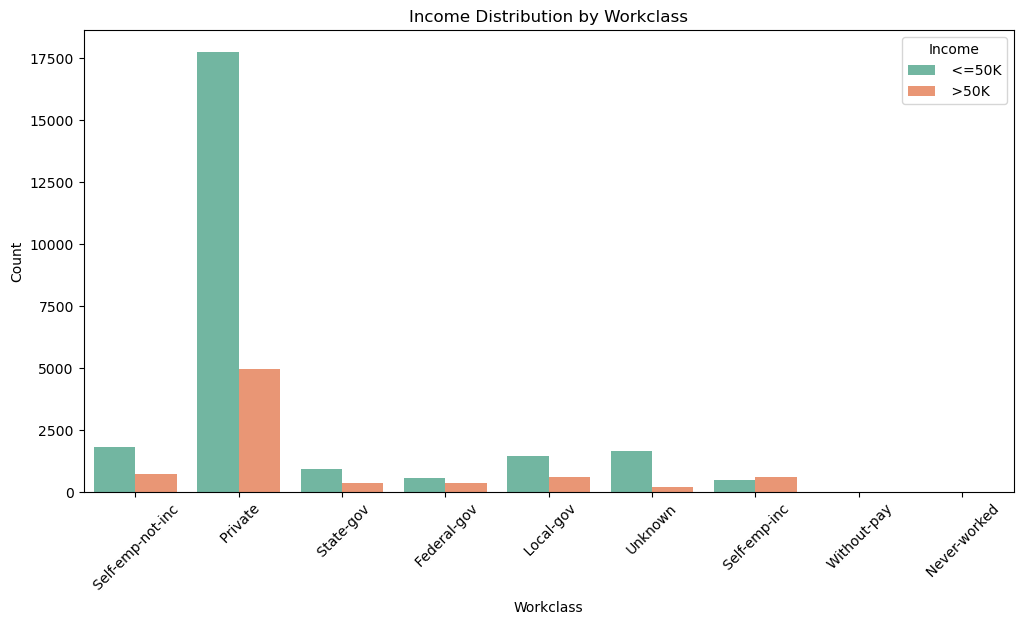

In [114]:
#Count Plot of Income Distribution by Workclass

plt.figure(figsize=(12, 6))

sns.countplot(x='Workclass', hue='Income', data=df, palette='Set2')
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

The income distribution by workclass shows that most people in different job categories earn 50K dollar or less, with many low earners in the Private sector. On the other hand, job types like local-gov,self-emo-not-inc, Self-emp-inc and Federal-gov have a good number of individuals making over 50K dollar, while private still have the highest individual with more than 50k dollar. Categories like Without-pay and Never-worked have very few people, so they don’t affect the overall picture much. This analysis suggests that some jobs are associated with higher incomes, which means the type of work can greatly influence how much a person earns.

# 3. Education Level vs Income

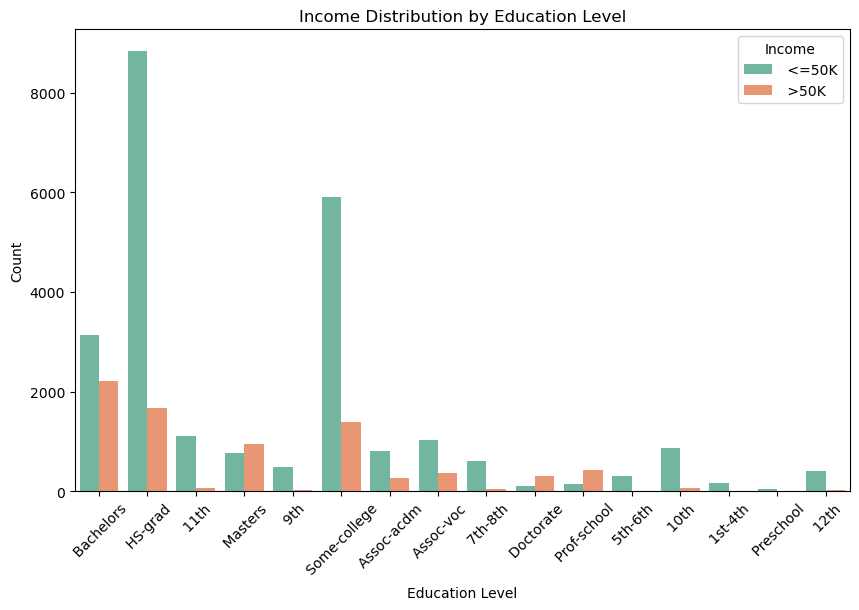

In [115]:
#Count Plot of Income Distribution by Education 

plt.figure(figsize=(10, 6))

sns.countplot(x='Education', hue='Income', data=df, palette='Set2')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

# 4. Age vs Income

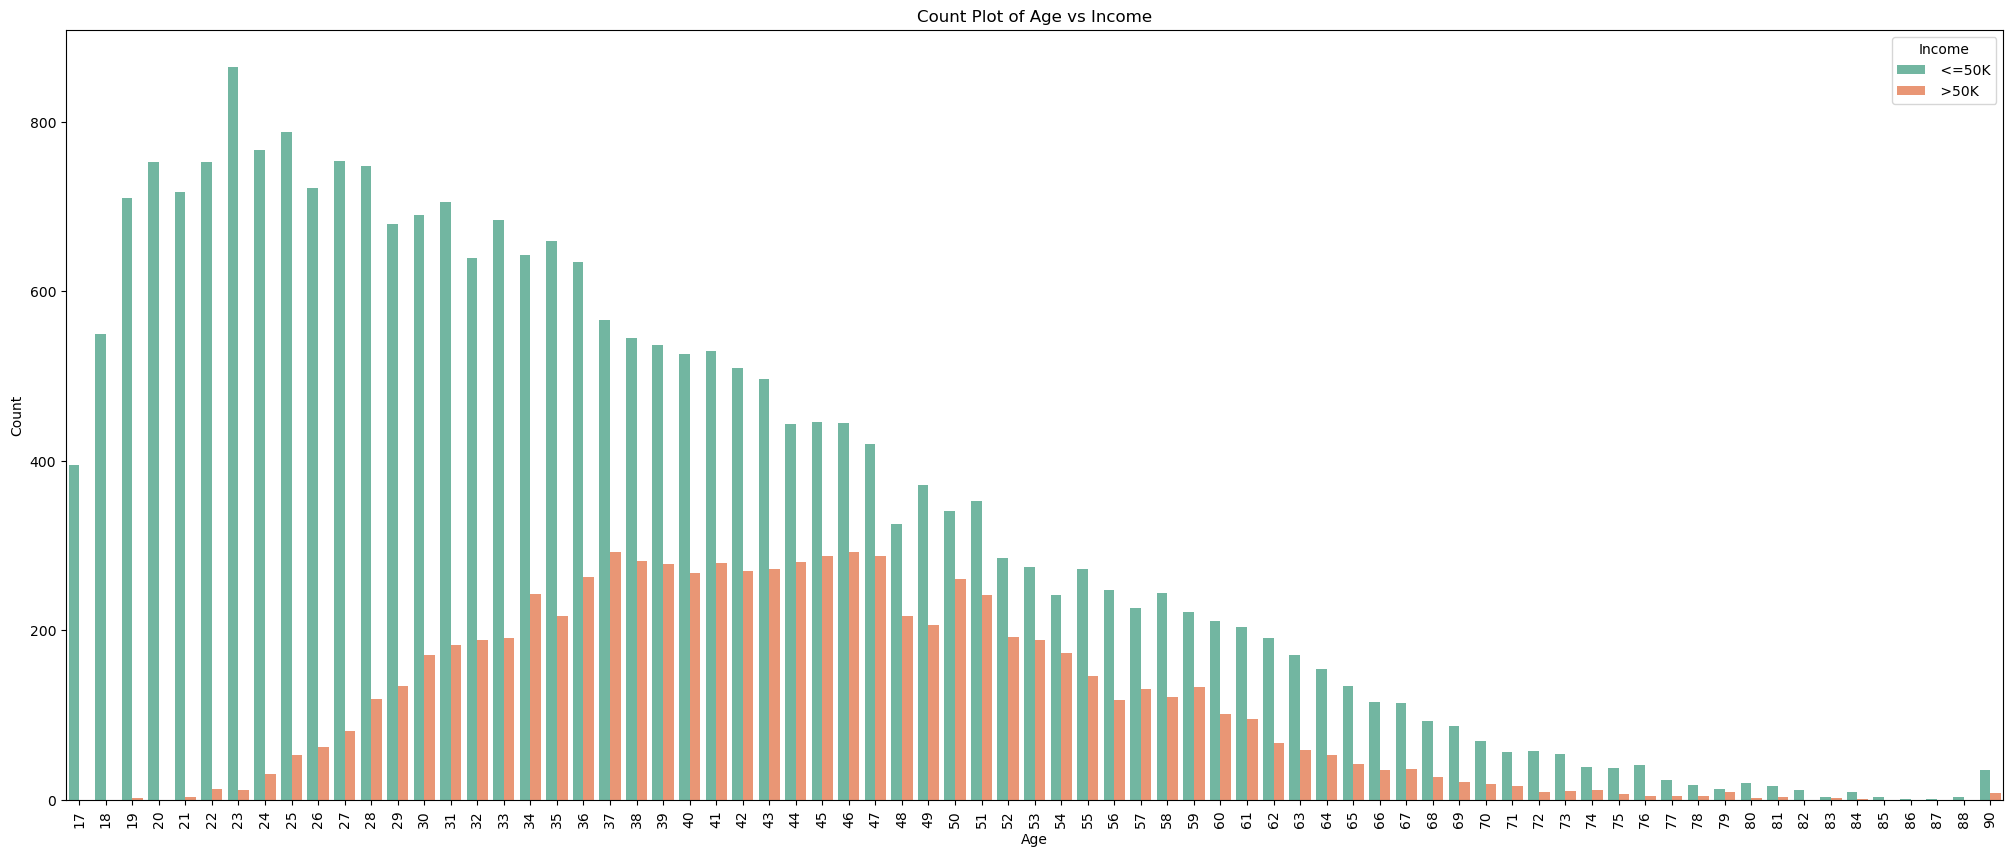

In [116]:
#Count Plot of Age Distribution by Income Level

plt.figure(figsize=(25, 10))

sns.countplot(x='Age', hue='Income', data=df, palette='Set2')
plt.title('Count Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

# 5. Marital Status vs Income

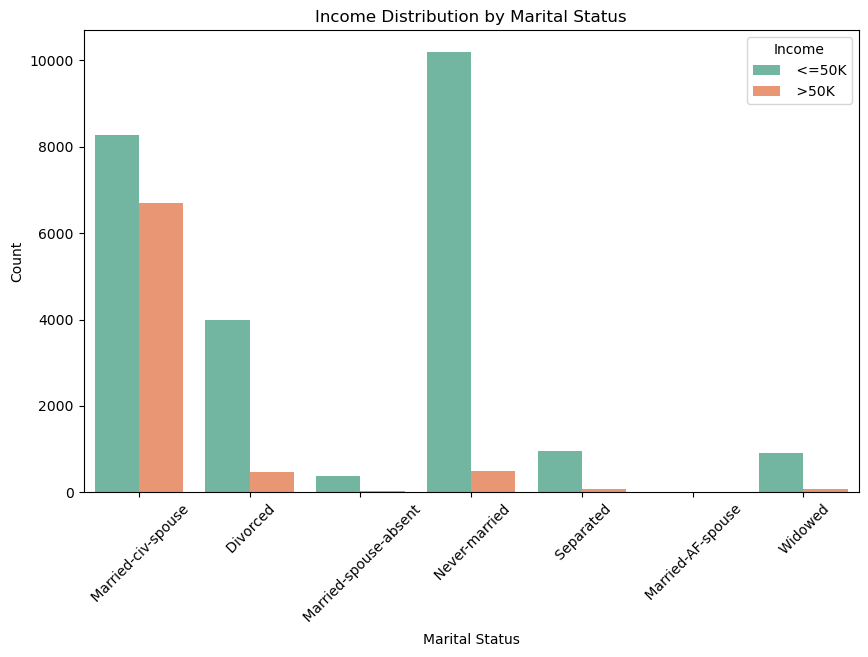

In [117]:
# count plot of Income Distribution by Marital Status

plt.figure(figsize=(10, 6))

sns.countplot(x='Marital_status', hue='Income', data=df, palette='Set2')
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 6. Occupation vs Income

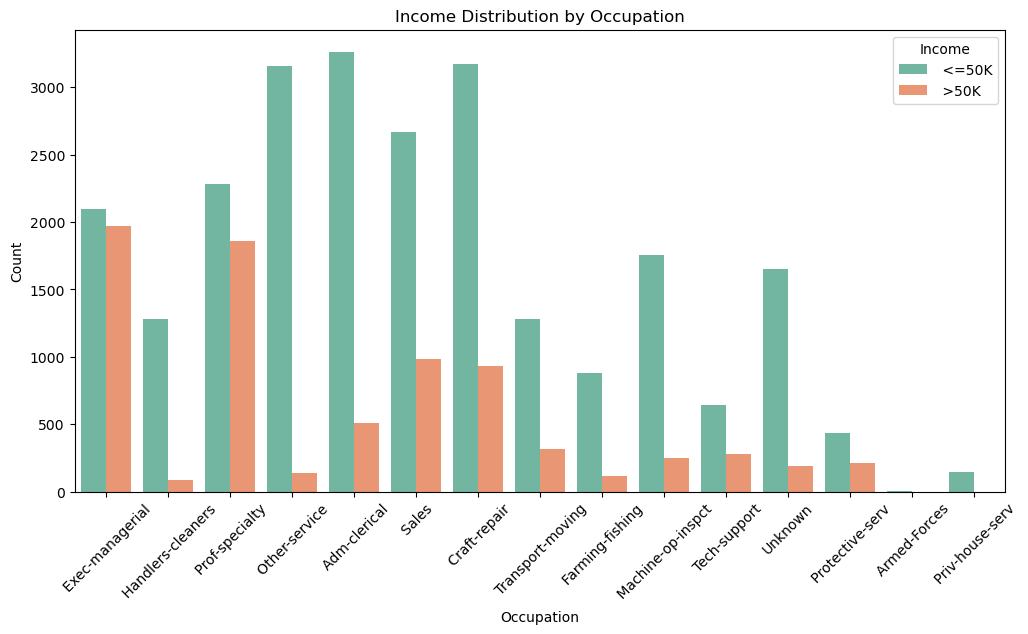

In [118]:
#count plot Income Distribution by Occupation

plt.figure(figsize=(12, 6))

sns.countplot(x='Occupation', hue='Income', data=df, palette='Set2')
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 7. Relationship vs Income

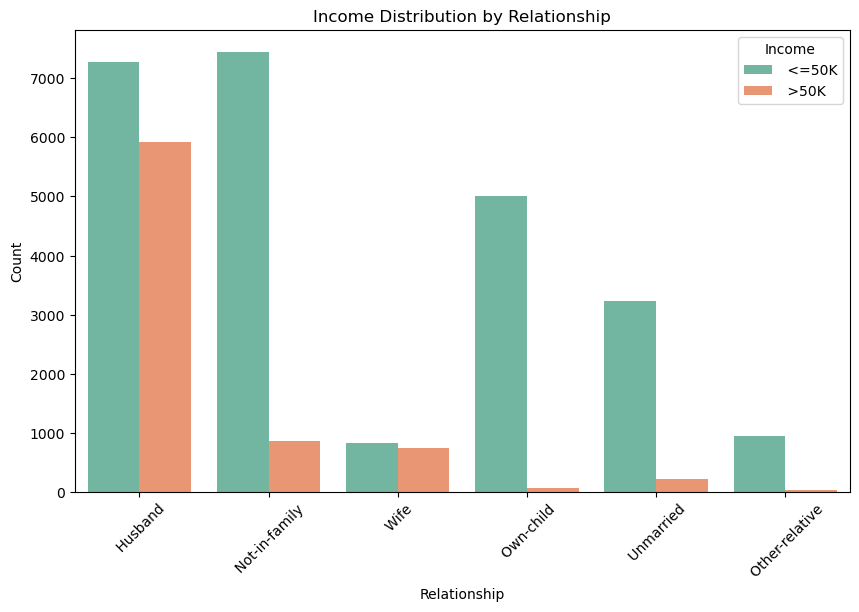

In [119]:
# count plot of Income Distribution by Relationship

plt.figure(figsize=(10, 6))

sns.countplot(x='Relationship', hue='Income', data=df, palette='Set2')
plt.title('Income Distribution by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 8. Race vs Income

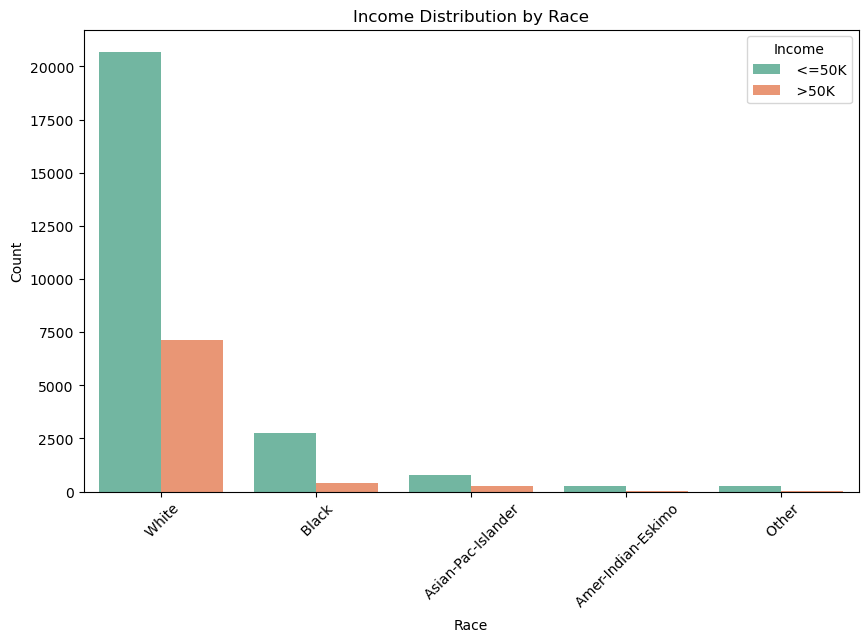

In [120]:
# countplot for Income distribution by Race

plt.figure(figsize=(10, 6))

sns.countplot(x='Race', hue='Income', data=df, palette='Set2')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 9. Native country vs Income

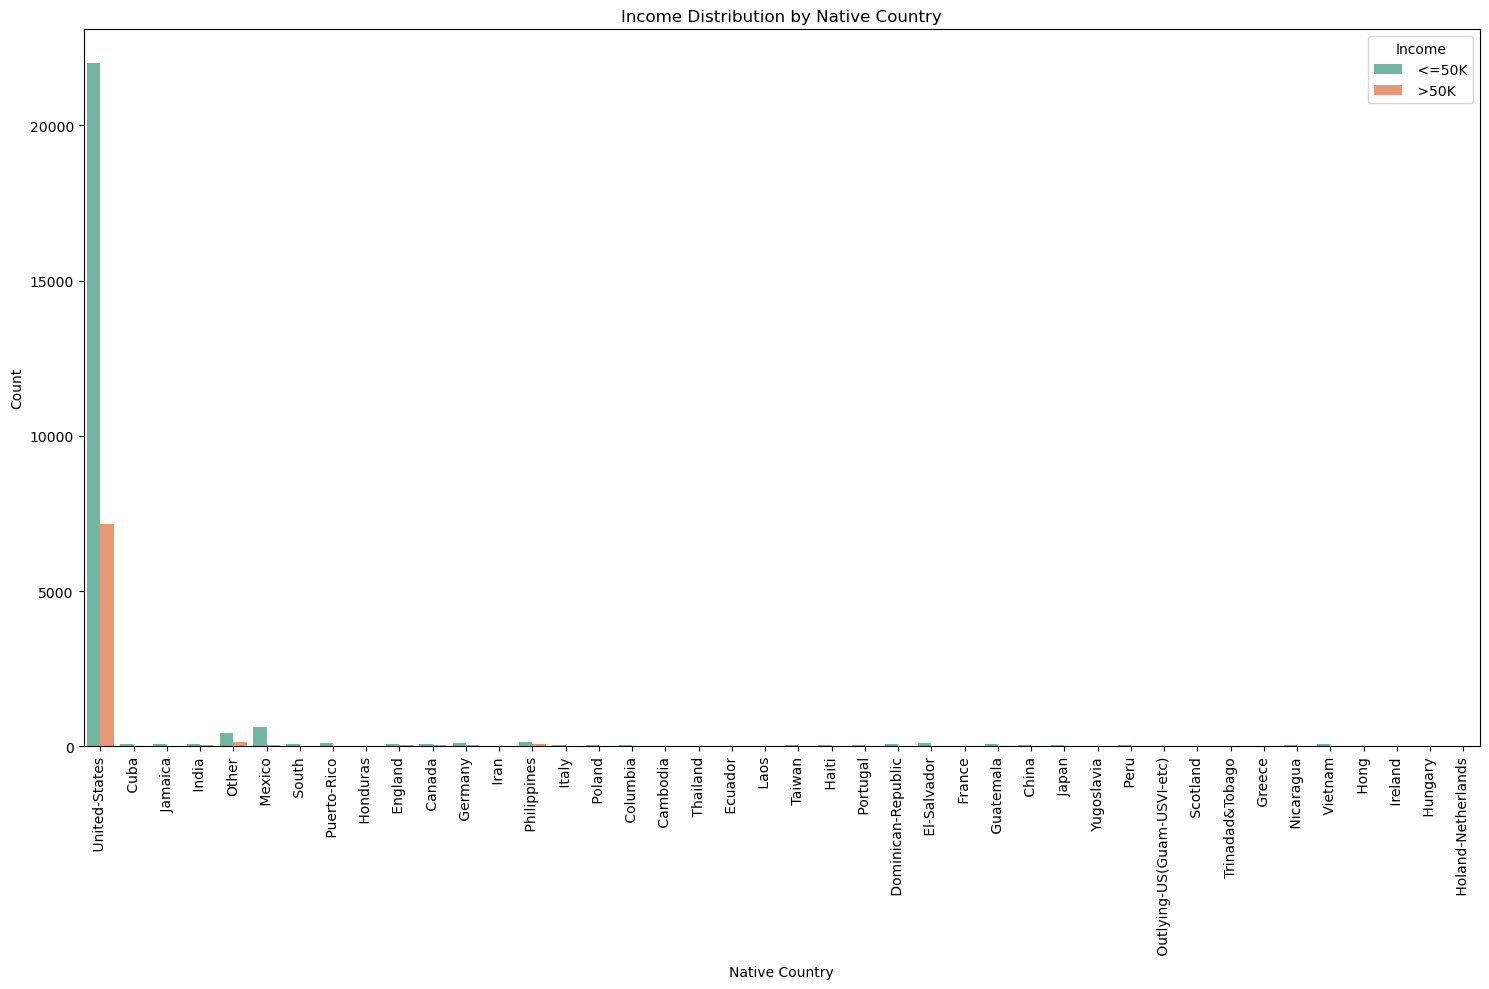

In [121]:
#Income Distribution by Native Country

plt.figure(figsize=(15, 10))

sns.countplot(x='Native_country', hue='Income', data=df, palette="Set2")
plt.title("Income Distribution by Native Country")
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

# 10. Native country vs Income (for better visualisation on log scale)

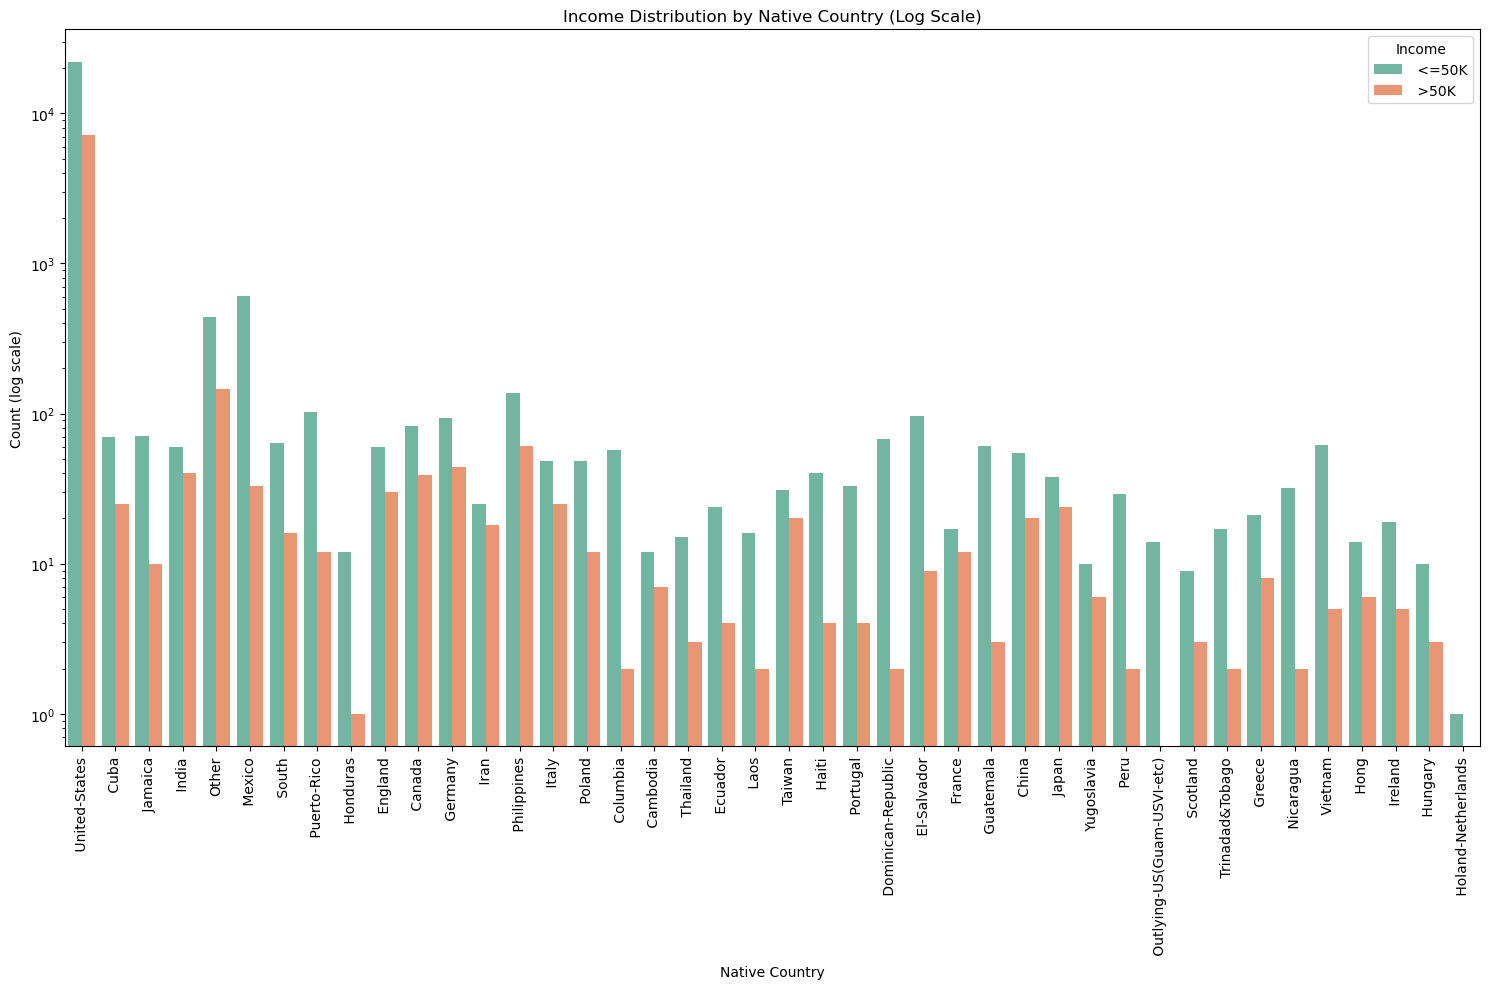

In [122]:
#Income Distribution by Native Country

plt.figure(figsize=(15, 10))

sns.countplot(x='Native_country', hue='Income', data=df, palette="Set2")
plt.yscale('log')  
plt.title("Income Distribution by Native Country (Log Scale)")
plt.xlabel('Native Country')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 11. Count of hours pr week vs Income

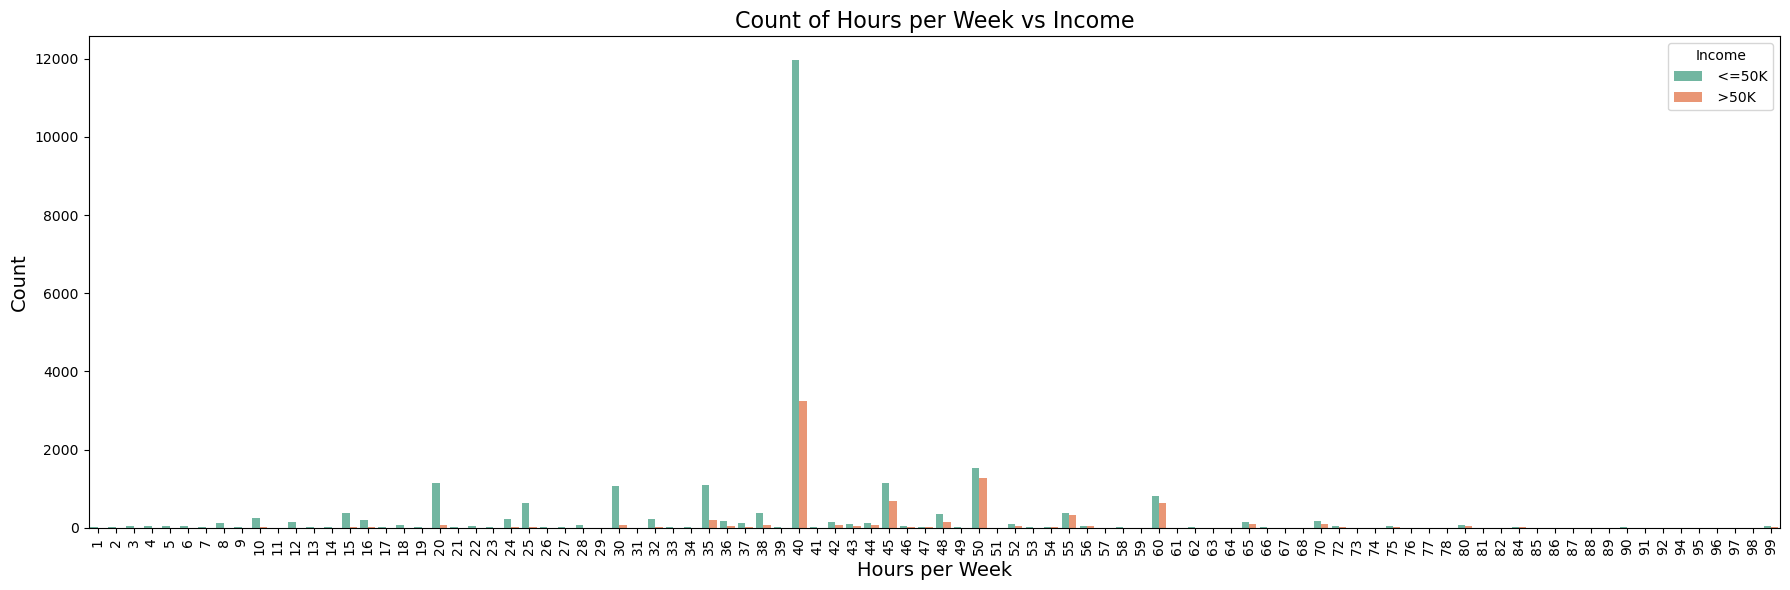

In [123]:
# Count hours per week vs Income

plt.figure(figsize=(18, 6)) 

sns.countplot(x='Hours_per_week', hue='Income', data=df, palette="Set2")
plt.title("Count of Hours per Week vs Income", fontsize=16)
plt.xlabel("Hours per Week", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

# 12. Count of hours per week vs Income (Binned for better visulisation)

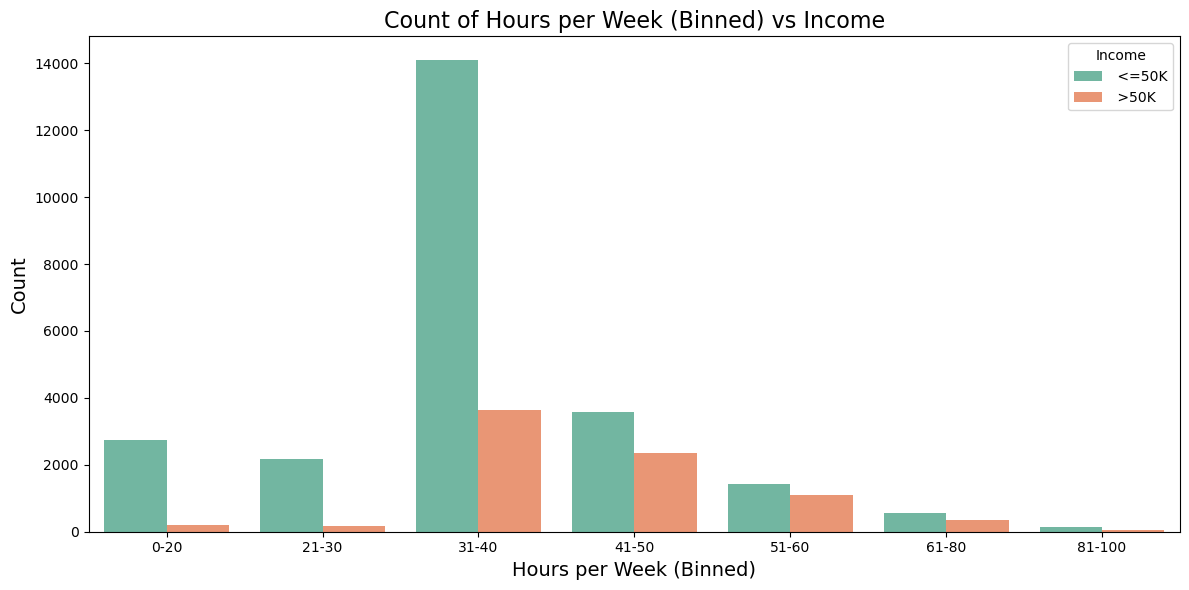

In [124]:
# Binned the 'Hours_per_week' column for better visulisaton

bins = [0, 20, 30, 40, 50, 60, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-80', '81-100']
df['Hours_per_week_binned'] = pd.cut(df['Hours_per_week'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))

sns.countplot(x='Hours_per_week_binned', hue='Income', data=df, palette="Set2")
plt.title("Count of Hours per Week (Binned) vs Income", fontsize=16)
plt.xlabel("Hours per Week (Binned)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()

In [125]:
#Dropped binned column(Extra column created)
df.drop('Hours_per_week_binned', axis=1, inplace=True)

# Pairwise Relationships of Features

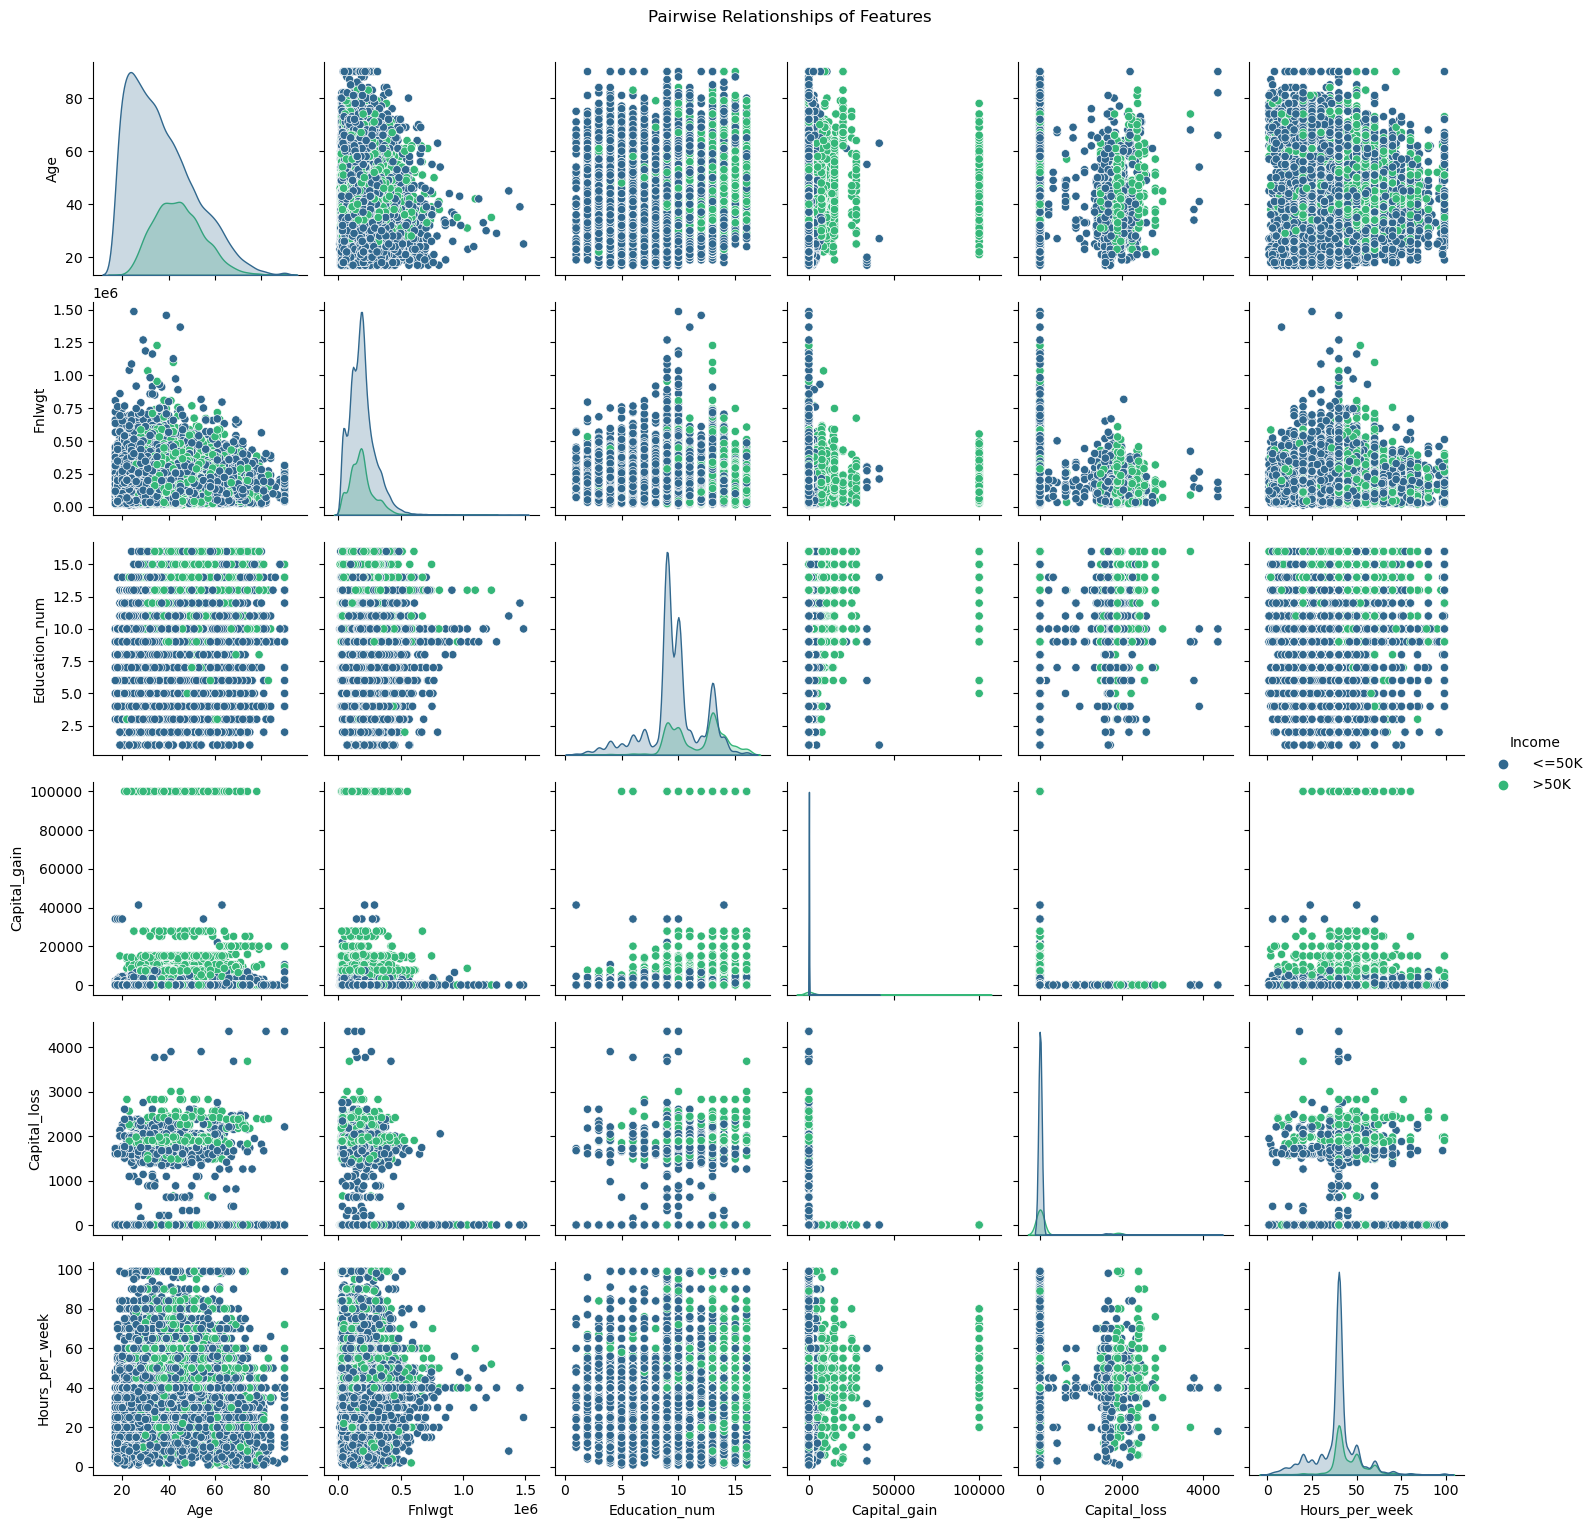

In [126]:
# Creating pairplot

sns.pairplot(df, hue="Income", palette="viridis")
plt.suptitle("Pairwise Relationships of Features", y=1.02) 
plt.show()

# Encoding Categorical Columns

In [127]:
# List of columns 
columns_to_encode = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

#LabelEncoder
encoder = LabelEncoder()

# Applying Label Encoding to all specified columns
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

In [128]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0


In [129]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Outliers Check with the help of boxplot

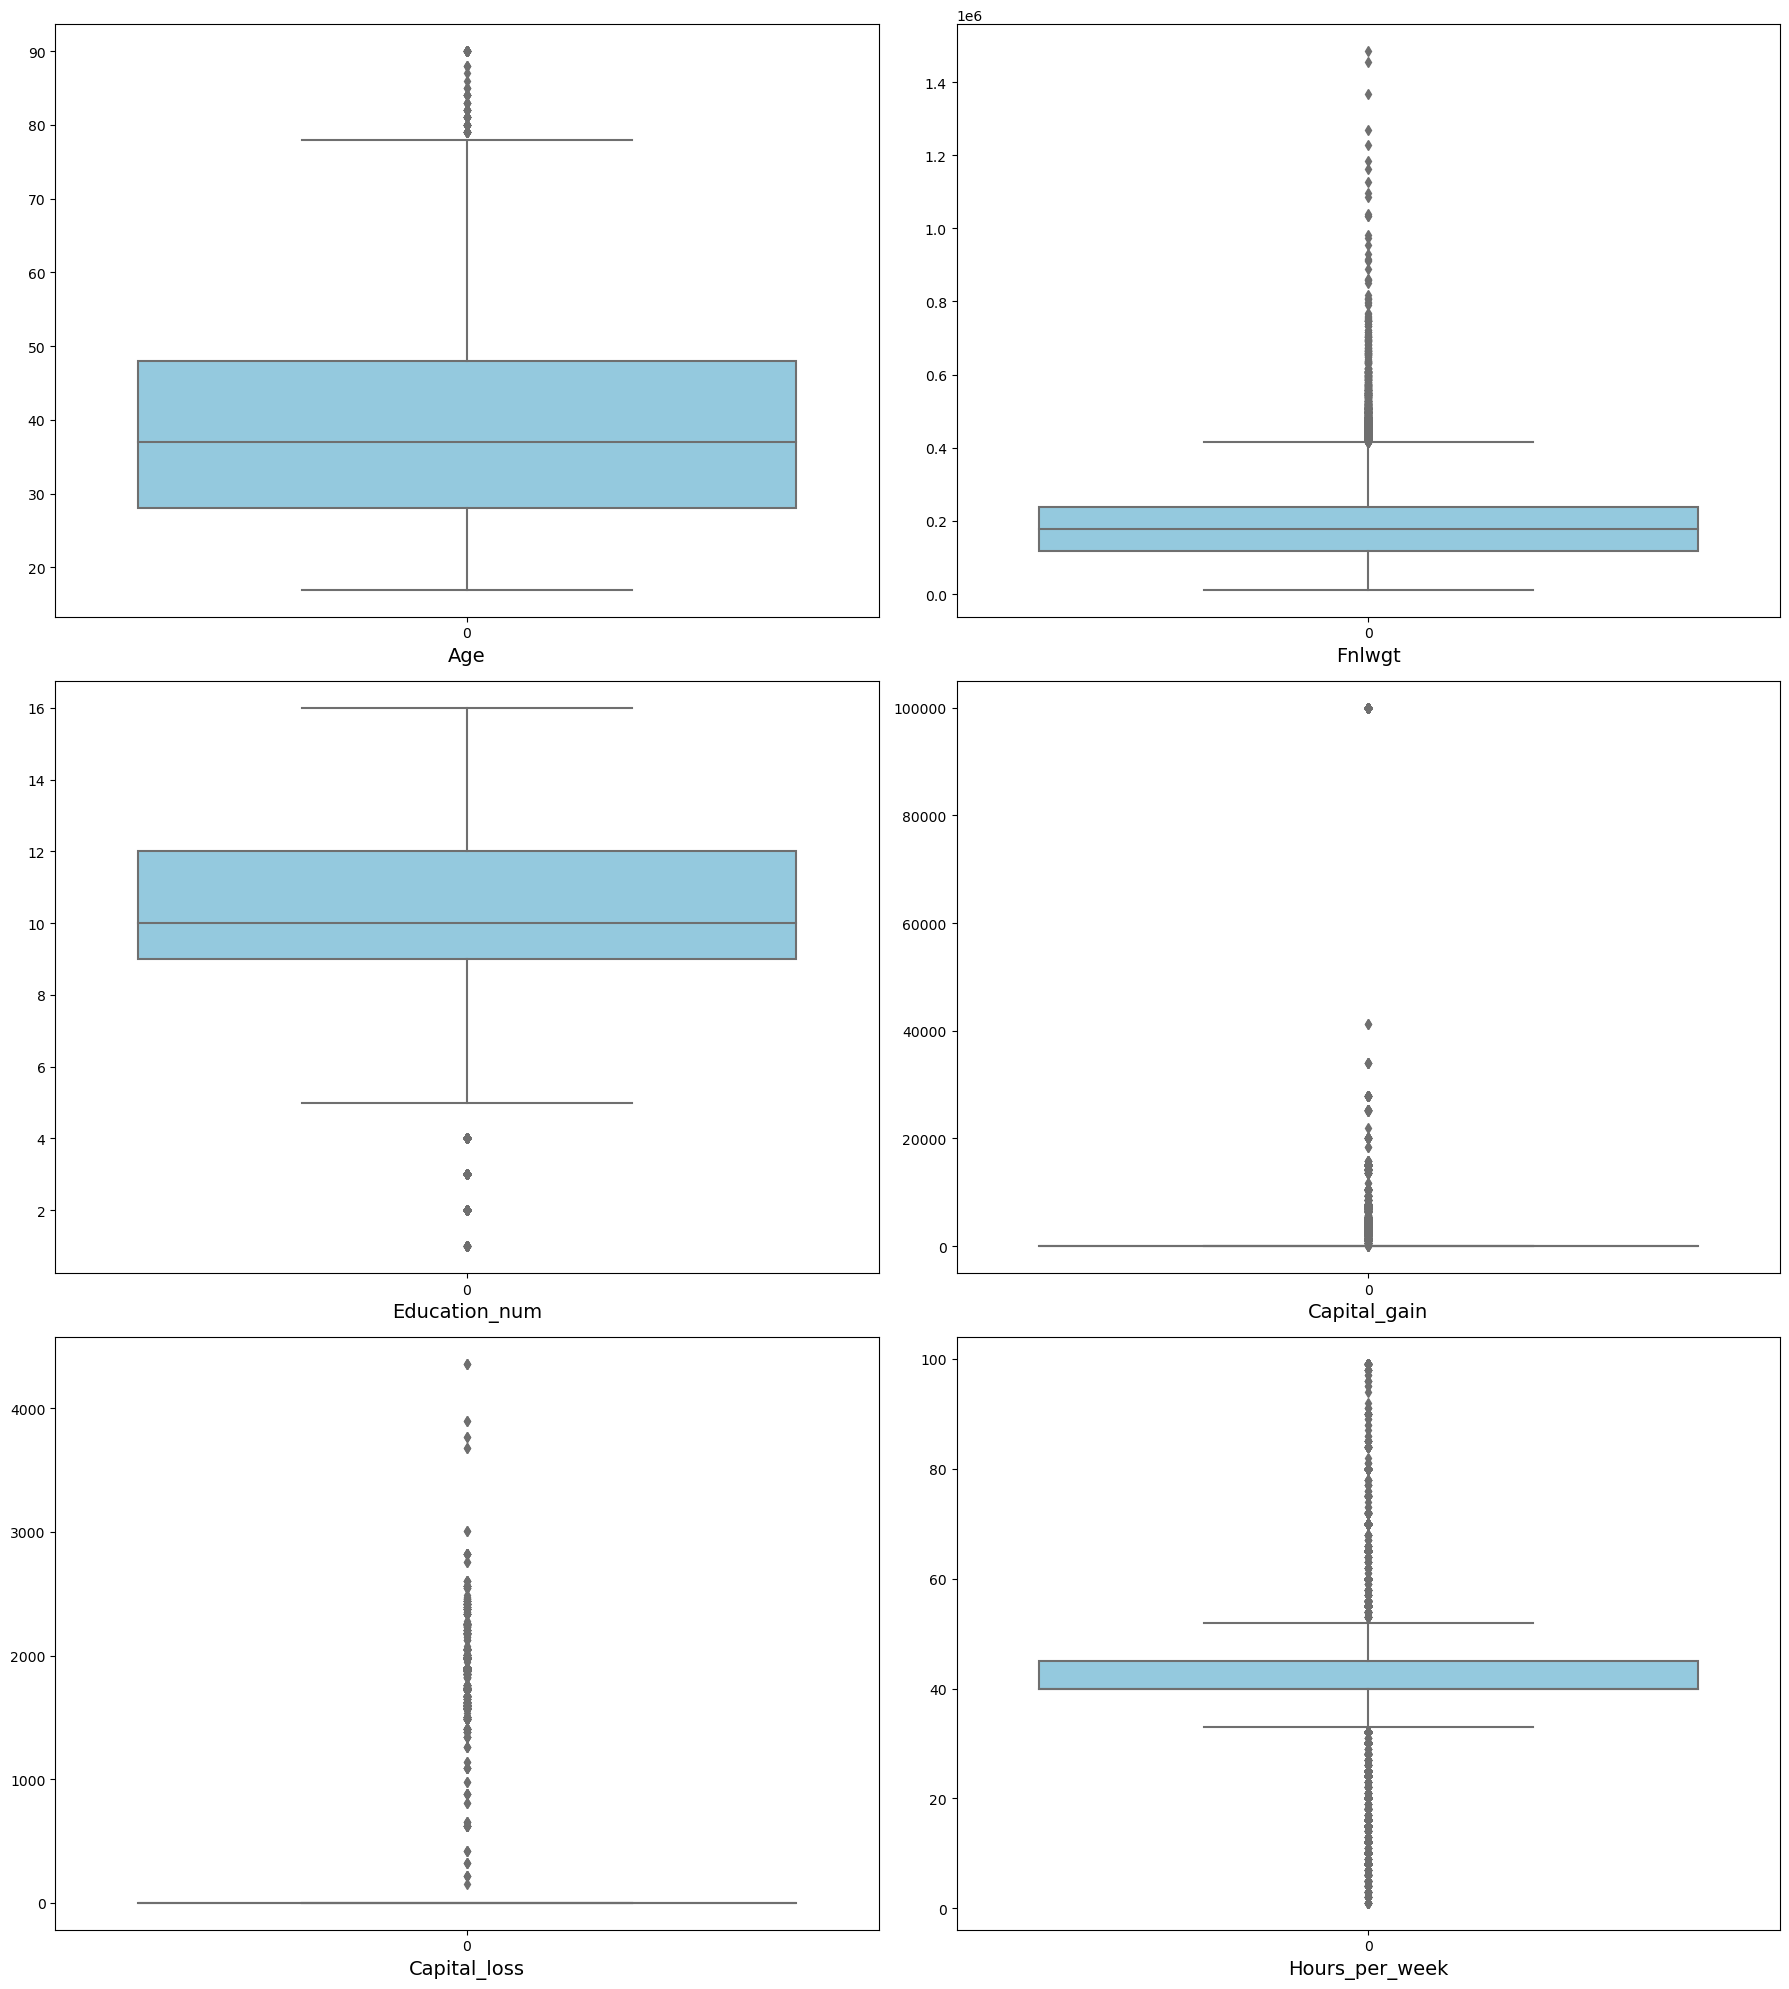

In [130]:
# Boxplot to see outliers
o_numeric_columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

plt.figure(figsize=(18, 20), facecolor='white')
col = 1

for column in o_numeric_columns:
    if col <= len(o_numeric_columns):
        ax = plt.subplot(3, 2, col) 
        sns.boxplot(df[column], color='skyblue') 
        plt.xlabel(column, fontsize=14)
    col += 1

plt.tight_layout()
plt.show()


# Removing Outliers

In [131]:
#Removing Outliers

z = np.abs(zscore(df))
threshold = 3
df_filtered = df[(z < threshold).all(axis=1)]

print("Shape of the dataframe before removing outliers: ", df.shape)
print("Shape of the dataframe after removing outliers: ", df_filtered.shape)

Shape of the dataframe before removing outliers:  (32560, 15)
Shape of the dataframe after removing outliers:  (27783, 15)


# skewness

In [132]:
df.skew()

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
Income             1.212383
dtype: float64

we observed :

A.  High Skewness :

    Capital_gain (11.95): Extremely high skewness with a long tail on the right.

    Capital_loss (4.59): High skewness with a long tail on the right.

    Fnlwgt (1.45): Moderately high skewness with a long tail on the right.

    Workclass (1.17): Moderately high skewness with a long tail on the right.

    Income (1.21): Moderately high skewness with a long tail on the right.

B. High Skewness (Long tail on the left):

    Native_country (-4.21): High skewness with a long tail on the left.

    Race (-2.44): High skewness with a long tail on the left.
 
C. Low to Moderate Skewness:

    Age (0.56), Relationship (0.79): Moderately skewed with a long tail on the right.

    Sex (-0.72), Education (-0.93): Moderately skewed with a long tail on the left.
  
D. Low Skewness :

    Education_num (-0.31), Marital_status (-0.01), Occupation (0.13), Hours_per_week (0.23): Nearly symmetrical distributions.

# Visulisation of Skewness can be seen below

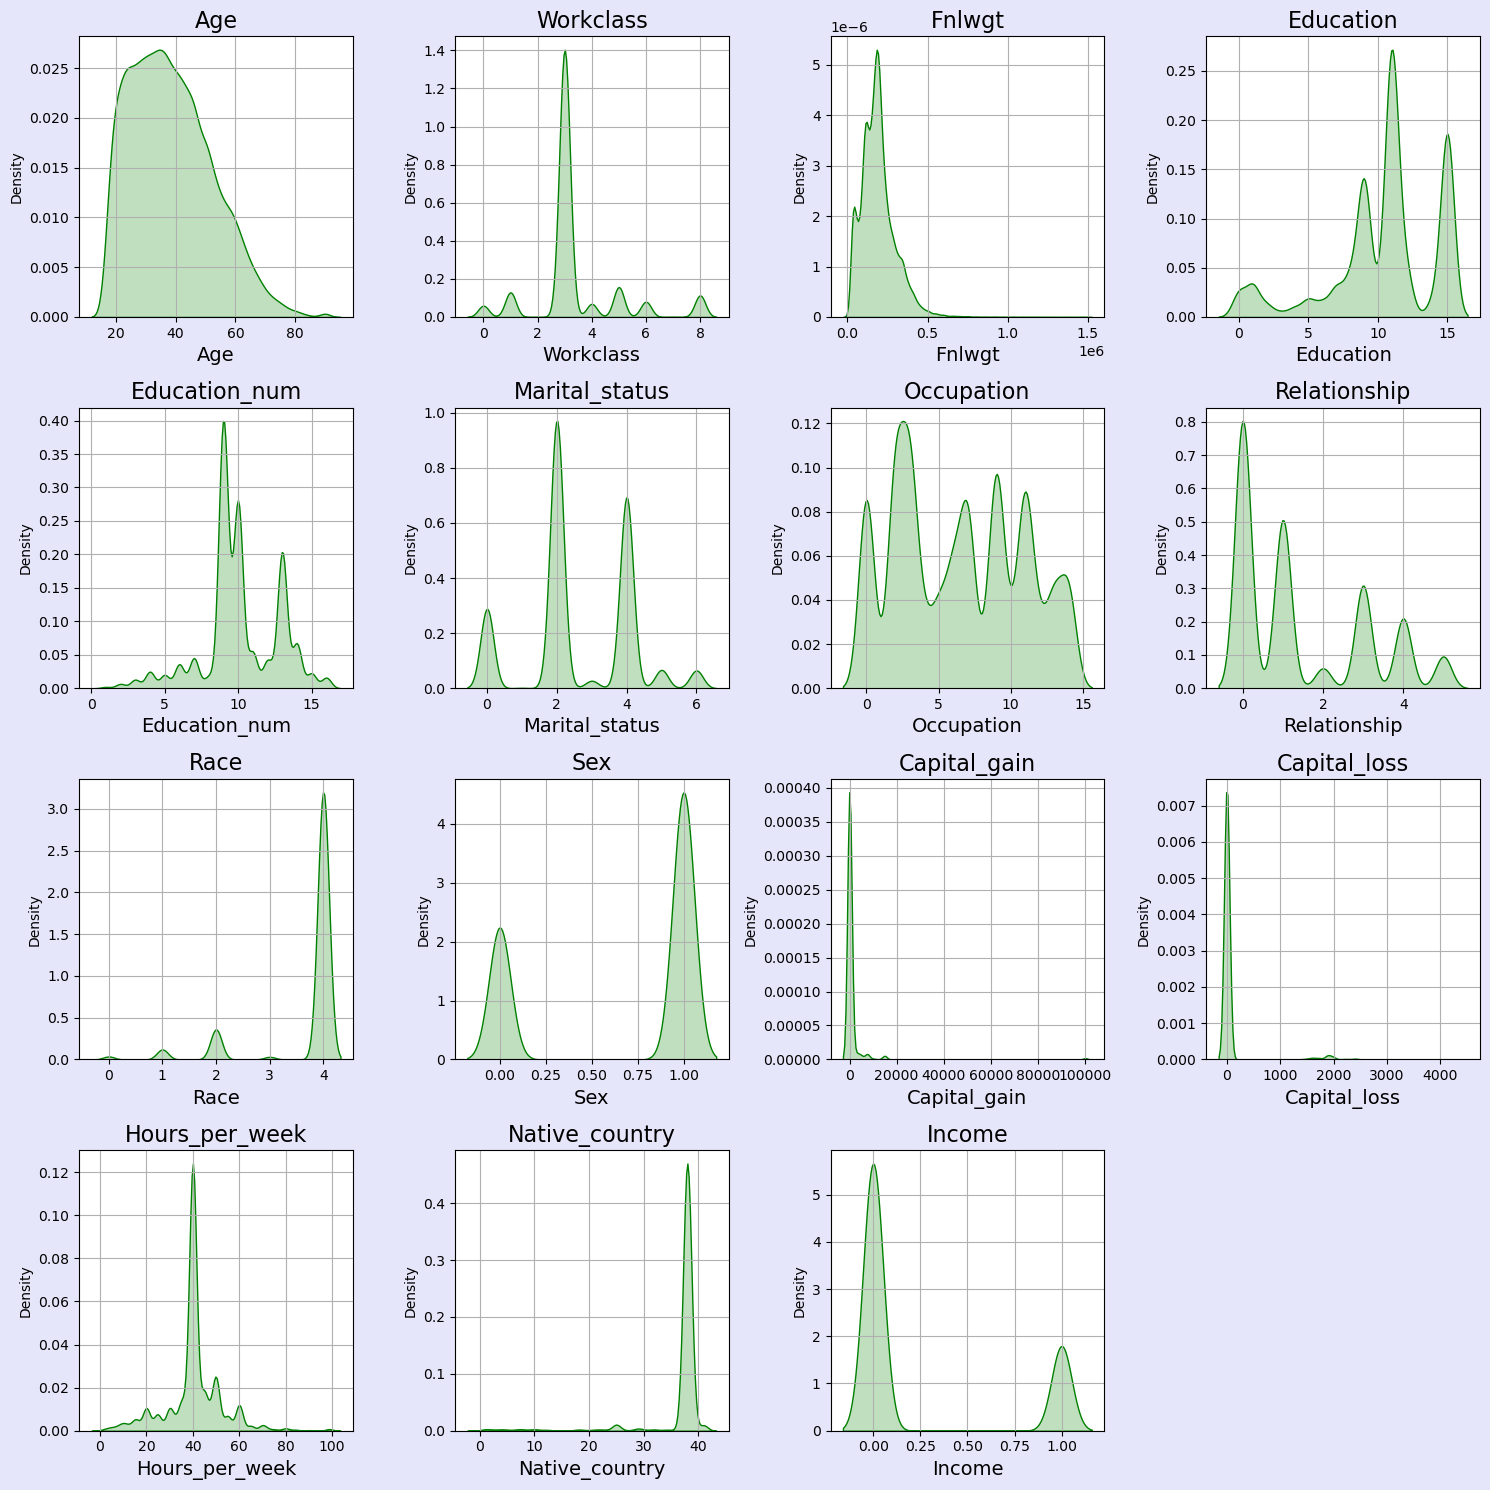

In [133]:
# Kernel Density Estimation (KDE) Plots for Numeric Columns
plt.figure(figsize=(15, 15), facecolor='lavender')


for col_no, col in enumerate(df.select_dtypes(include=['int64', 'int32']), start=1):
    ax = plt.subplot(4, 4, col_no)  
    sns.kdeplot(df[col], color='g', shade=True)
    plt.title(col, fontsize=16)  
    plt.xlabel(col, fontsize=14)
    plt.grid(True) 
plt.tight_layout()  
plt.show()

# Removing Skewness

In [134]:
# Initialization

pt = PowerTransformer(method='yeo-johnson')
skew_column = ['Fnlwgt', 'Capital_gain', 'Capital_loss']
for col in skew_column:
    df[col] = pt.fit_transform(df[[col]])
    
print(df[skew_column].skew())

Fnlwgt          0.016914
Capital_gain    3.016951
Capital_loss    4.299511
dtype: float64


# Dropping Unnecessary columns which may create error in the modeling acc.

In [135]:
df.drop(['Capital_gain', 'Capital_loss'], axis=True, inplace= True)

In [136]:
#Rechecking dataset
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.089889,9,13,2,3,0,4,1,13,38,0
1,38,3,0.398743,11,9,0,5,1,4,1,40,38,0


In [137]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.069881,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.022070,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,-0.093413,0.001240,-0.055098
Fnlwgt,-0.069881,-0.022070,1.000000,-0.029094,-0.041339,0.027809,-0.001521,0.009995,-0.014211,0.023510,-0.022200,-0.065815,-0.005229
Education,-0.010508,-0.019358,-0.029094,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.041339,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.027809,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.001521,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.009995,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.014211,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.023510,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.229312,0.003007,0.215995


# observation

     Age has a moderate positive correlation with Income (0.23), indicating that older individuals might have a slightly higher income on average.

    Education_num has a notable positive correlation with Income (0.34), suggesting that individuals with a higher education level tend to earn more.

    Relationship has a strong negative correlation with Sex (-0.58), which might be related to how gender roles and relationship statuses are defined in the dataset.

    Marital_status and Age have a moderate negative correlation (-0.27), implying that age and marital status have some relationship, possibly indicating that younger individuals are less likely to be married.

    Occupation and Workclass show a positive correlation (0.31), indicating some dependency between the two, which makes sense as work class often influences job type.

    Most of the variables show weak correlations with each other, indicating that they are relatively independent.

# visualisation of data correlation = df.corr

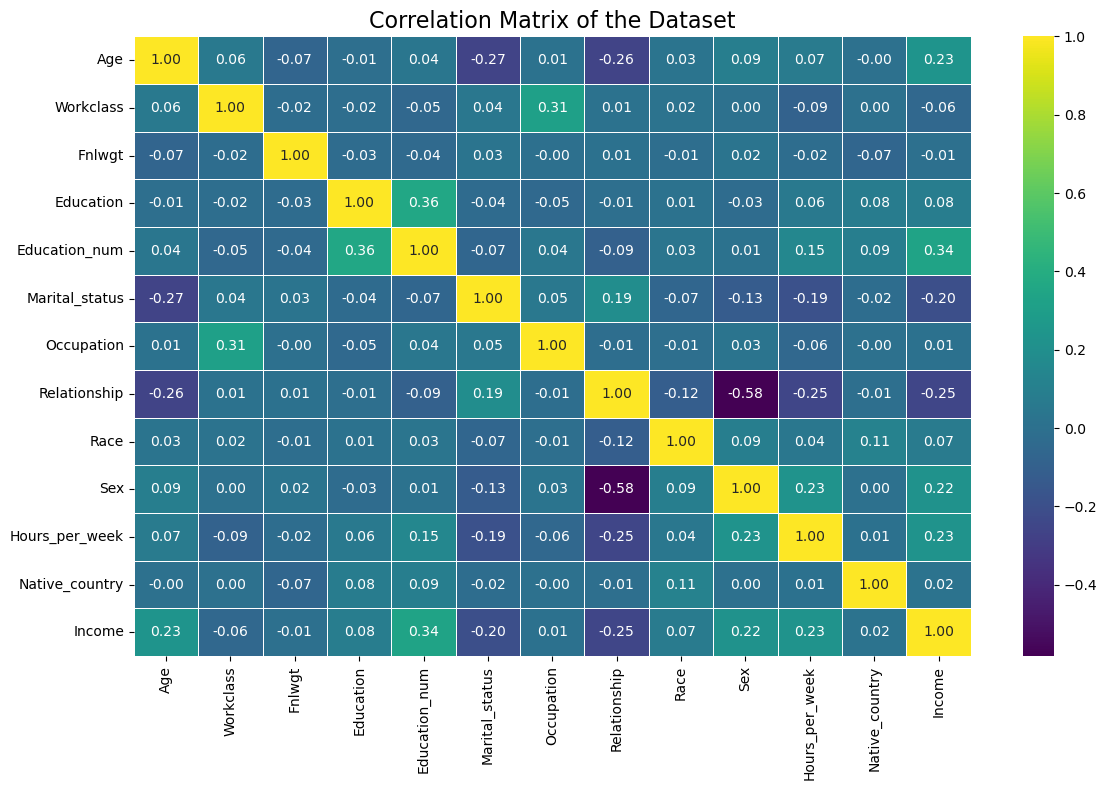

In [138]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of the Dataset", fontsize=16)
plt.tight_layout()
plt.show()

# Seperating features and label in x & y

In [139]:
# Dividing the data into features and target variable
x=df.drop(['Income'],axis=1)
y=df['Income']

In [140]:
#Standardization of data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [141]:
# Spliting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
# Applying SMOTE to the training set to balance the classes
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [143]:
# # Converting x_train_smote back to a DataFrame with the original column names for VIF calculation
x_train_smote_df = pd.DataFrame(x_train_smote, columns=x.columns)

In [144]:
x_train_smote.shape

(39550, 12)

In [145]:
y_train_smote.value_counts()

Income
1    19775
0    19775
Name: count, dtype: int64

# VIF Calculation

In [146]:
#calculating VIF

def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [147]:
vif_result = calc_vif(x_train_smote_df)
print(vif_result)

         variables  VIF FACTOR
0              Age    1.163805
1        Workclass    1.101151
2           Fnlwgt    1.010714
3        Education    1.099165
4    Education_num    1.163911
5   Marital_status    1.140073
6       Occupation    1.095798
7     Relationship    2.002496
8             Race    1.039328
9              Sex    1.868419
10  Hours_per_week    1.162043
11  Native_country    1.027478


The VIF values shows that there is no strong multicollinearity among the features in  dataset. All the VIF factors are below the commonly used threshold of 10, indicating that the predictors are not highly correlated with each other. Now we can proceed with model training without any concerns regarding multicollinearity affecting the results.

# Model Training

# 1. Logistic Regression

In [148]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

In [149]:
# Train the model
log_reg.fit(x_train_smote, y_train_smote)

LogisticRegression(random_state=42)

In [150]:
# Make predictions
y_pred_lr = log_reg.predict(x_test)

In [151]:
# Evaluate model performance
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.7426
Precision: 0.4785
Recall: 0.7679
F1-Score: 0.5896

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      4944
           1       0.48      0.77      0.59      1568

    accuracy                           0.74      6512
   macro avg       0.69      0.75      0.70      6512
weighted avg       0.81      0.74      0.76      6512



# 2. Decision Tree Classifier

In [152]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

In [153]:
# Train the model
dt.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [154]:
# Make predictions
y_pred_dt = dt.predict(x_test)

In [155]:
# Evaluate model performance
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7855
Precision: 0.5495
Recall: 0.6059
F1-Score: 0.5763

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4944
           1       0.55      0.61      0.58      1568

    accuracy                           0.79      6512
   macro avg       0.71      0.72      0.72      6512
weighted avg       0.79      0.79      0.79      6512



# 3. Random Forest Classifier

In [156]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

In [157]:
# Train the model
rf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [158]:
# Make predictions
y_pred_rf = rf.predict(x_test)

In [159]:
# Evaluate model performance
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8305
Precision: 0.6455
Recall: 0.6562
F1-Score: 0.6509

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4944
           1       0.65      0.66      0.65      1568

    accuracy                           0.83      6512
   macro avg       0.77      0.77      0.77      6512
weighted avg       0.83      0.83      0.83      6512



# 4. Support Vector Classifier

In [160]:
# Initialize Support Vector Classifier
svc = SVC(random_state=42)

In [161]:
# Train the model
svc.fit(x_train_smote, y_train_smote)

SVC(random_state=42)

In [162]:
# Make predictions
y_pred_svc = svc.predict(x_test)

In [163]:
# Evaluate model performance
print("Support Vector Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

Support Vector Classifier Performance:
Accuracy: 0.7853
Precision: 0.5339
Recall: 0.8540
F1-Score: 0.6570

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      4944
           1       0.53      0.85      0.66      1568

    accuracy                           0.79      6512
   macro avg       0.74      0.81      0.75      6512
weighted avg       0.84      0.79      0.80      6512



# 5. K-Nearest Neighbors

In [164]:
# Initialize K-Nearest Neighbors model
knn = KNeighborsClassifier()

In [165]:
# Train the model
knn.fit(x_train_smote, y_train_smote)

KNeighborsClassifier()

In [166]:
# Make predictions
y_pred_knn = knn.predict(x_test)

In [167]:
# Evaluate model performance
print("K-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Performance:
Accuracy: 0.7697
Precision: 0.5148
Recall: 0.7526
F1-Score: 0.6114

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      4944
           1       0.51      0.75      0.61      1568

    accuracy                           0.77      6512
   macro avg       0.71      0.76      0.72      6512
weighted avg       0.81      0.77      0.78      6512



# what we observed from above modeling

so we obseved Random Forest is the best overall model based on:

   Highest accuracy (0.83)

   Good balance between precision (0.65) and recall (0.66)

   It outperforms the others in terms of its robustness and consistency across multiple metrics. It has a well-balanced F1-score    as well, indicating it can generalize well.

# Hyperparameter tunning

# For Decision tree

In [168]:
# Initialization of the Decision Tree model
dt = DecisionTreeClassifier()

In [169]:
# Defining the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [170]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [172]:
# Fit 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [173]:
# Print 

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy Score: 0.8250534196498087


# For Random Forest

In [179]:
# Initialising the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [181]:
# Defining the parameter grid for Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}

In [182]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,cv=5, n_jobs=-1, verbose=2)

In [183]:
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [185]:
# print
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Accuracy Score:", grid_search_rf.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy Score: 0.838375180414527


# For svc

In [191]:
# Initialising the Support Vector Classifier
svc = SVC(random_state=42)

In [193]:
# Defining a simplified parameter 
param_grid_svc = {
    'C': [0.1, 1],             
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [194]:
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc,cv=3, n_jobs=-1, verbose=2)

In [196]:
grid_search_svc.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [197]:
# Best parameters found from GridSearchCV
print("Best Hyperparameters:", grid_search_svc.best_params_)
print("Best Accuracy Score:", grid_search_svc.best_score_)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score: 0.8259749189389843


# cross validating (Decision tree)

In [175]:
best_decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_split=4, min_samples_leaf=2, random_state=42)

In [177]:
# Performs 5-fold cross-validation
cv_scores = cross_val_score(best_decision_tree, x_train, y_train, cv=5)

In [178]:
# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores for each fold: [0.82514395 0.82648752 0.83627639 0.83221348 0.82242273]
Mean cross-validation score: 0.828508815209465


# cross validating(Random forest)

In [186]:
best_rf = grid_search_rf.best_estimator_

In [188]:
cv_scores_rf = cross_val_score(best_rf, x_train, y_train, cv=5)

In [190]:
# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_rf)
print("Mean cross-validation score:", cv_scores_rf.mean())

Cross-validation scores for each fold: [0.83435701 0.83819578 0.84587332 0.83605299 0.83739681]
Mean cross-validation score: 0.838375180414527


# cross validating(SVC)

In [198]:
best_svc = grid_search_svc.best_estimator_

In [200]:
cv_scores_svc = cross_val_score(best_svc, x_train, y_train, cv=3)

In [201]:
# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_svc)
print("Mean cross-validation score:", cv_scores_svc.mean())

Cross-validation scores for each fold: [0.82483013 0.83243119 0.82066344]
Mean cross-validation score: 0.8259749189389843


# Final conclusion

Over all RandomForest Classifier fits well and best suited for modeling. Hence RandomForest Classifier is best of all Model.

In [202]:
import joblib

# Saving the best model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Best Random Forest model saved as 'best_random_forest_model.pkl'")


Best Random Forest model saved as 'best_random_forest_model.pkl'


# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX